In [38]:
import importlib
import torch
import numpy as np
from utils import stats, img, shift

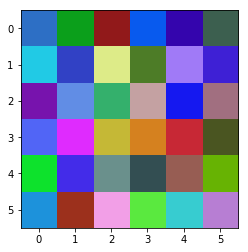

In [35]:
x = img.random_image(1, 6)
img.show_image(x)

torch.Size([1, 3, 6, 6])


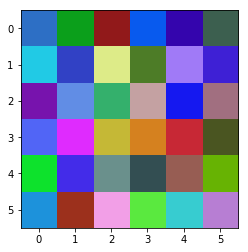

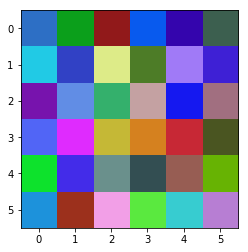

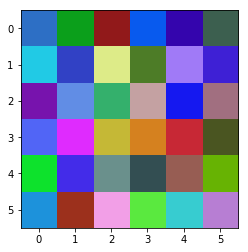

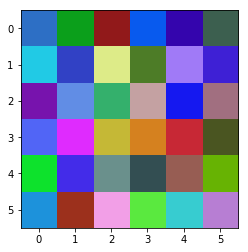

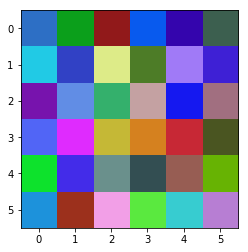

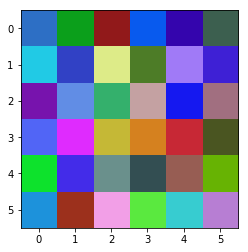

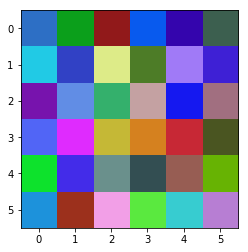

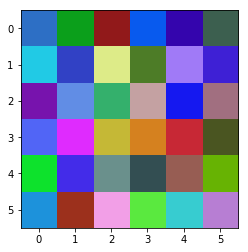

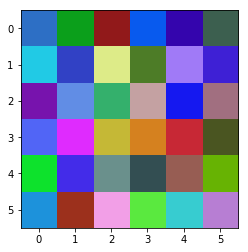

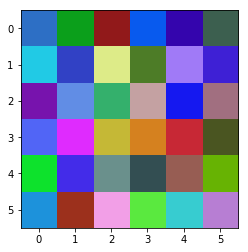

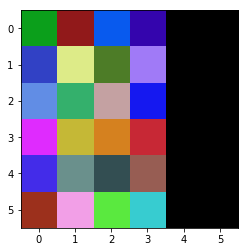

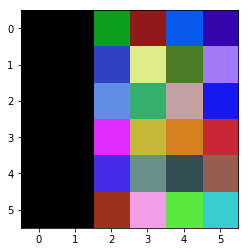

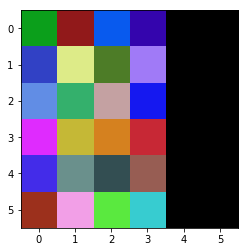

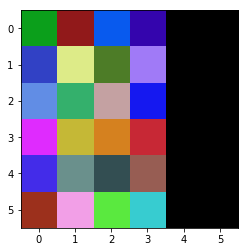

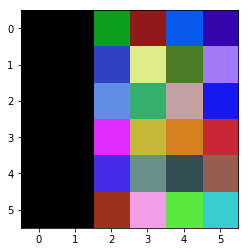

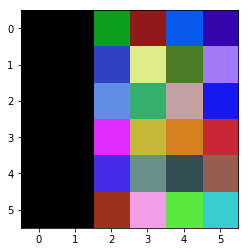

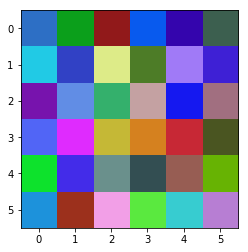

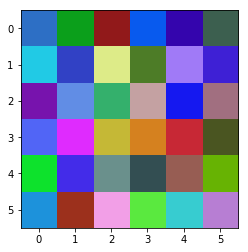

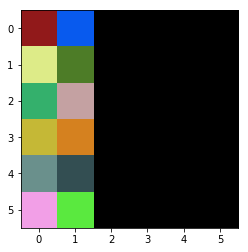

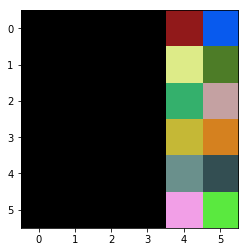

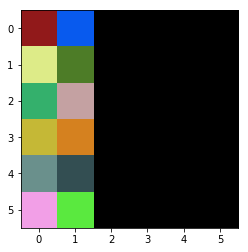

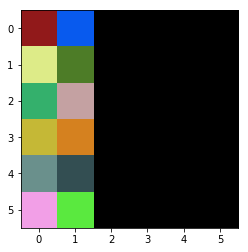

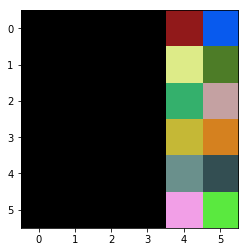

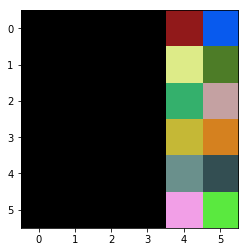

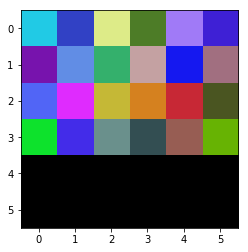

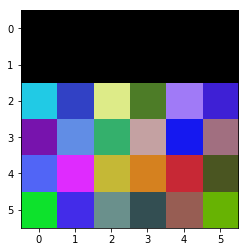

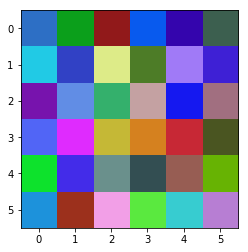

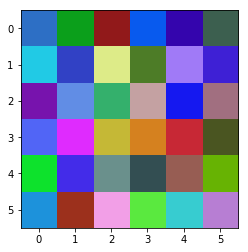

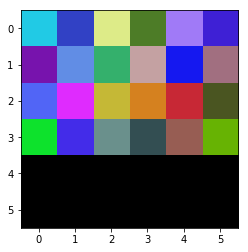

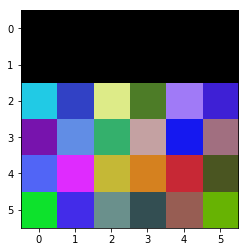

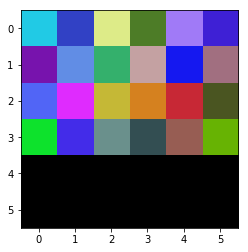

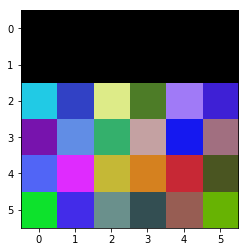

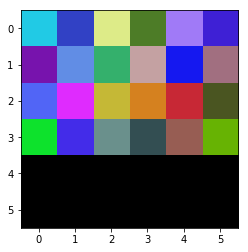

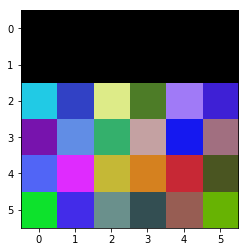

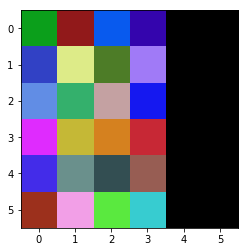

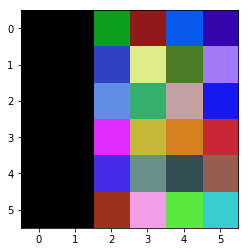

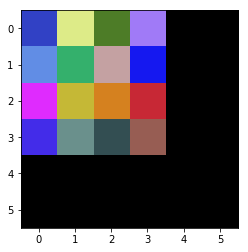

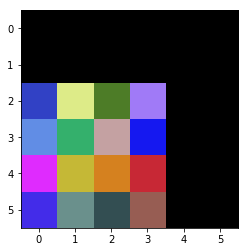

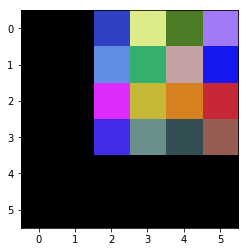

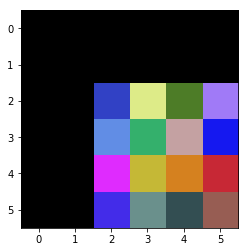

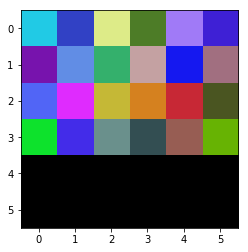

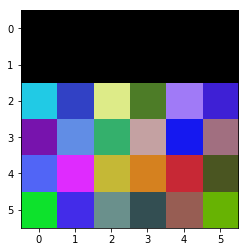

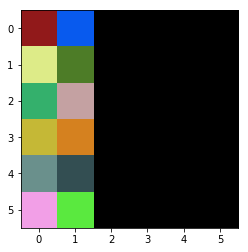

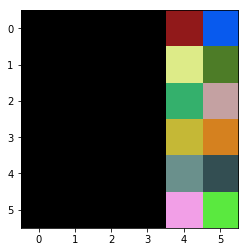

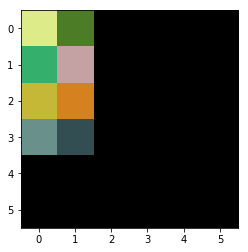

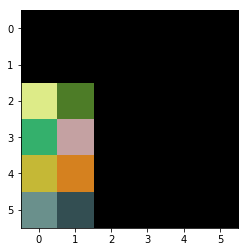

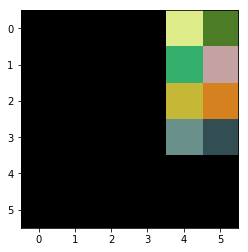

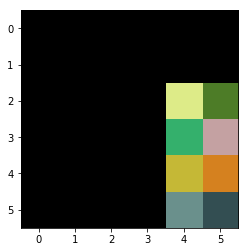

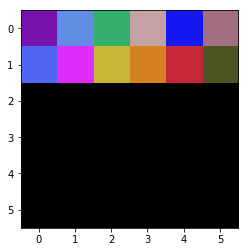

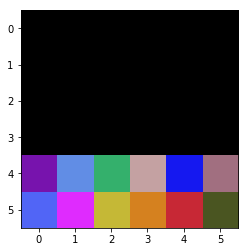

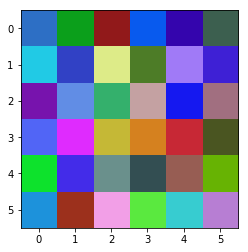

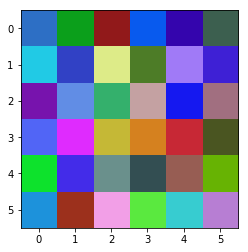

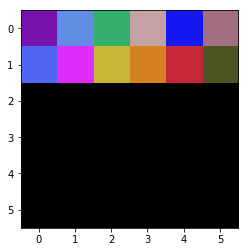

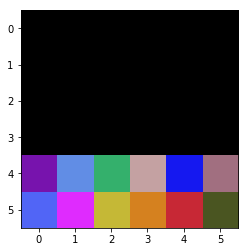

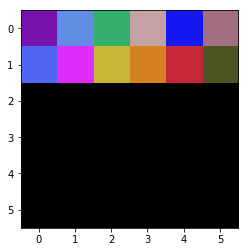

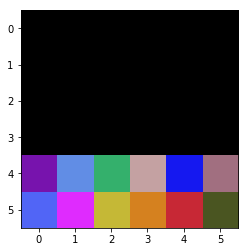

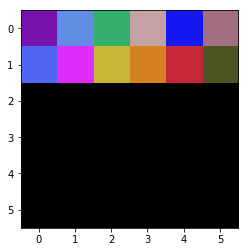

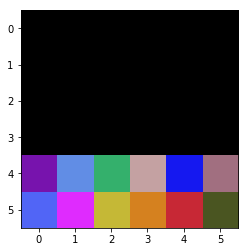

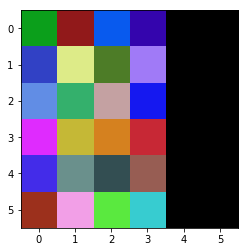

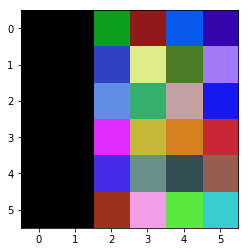

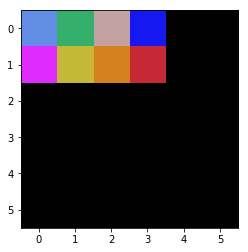

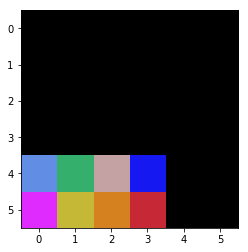

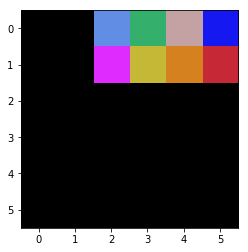

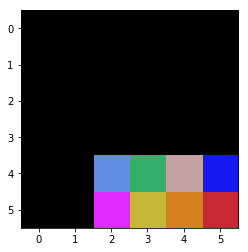

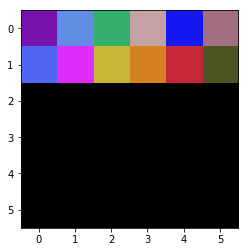

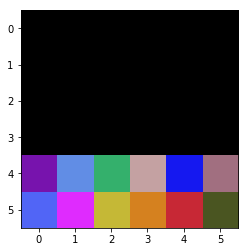

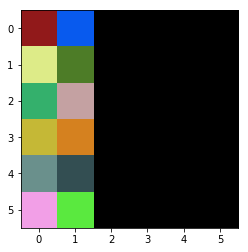

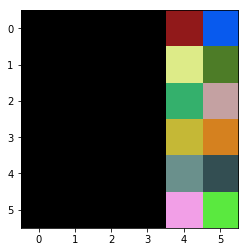

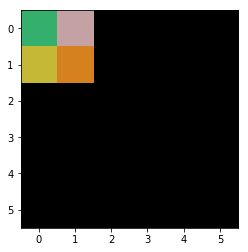

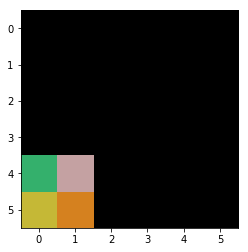

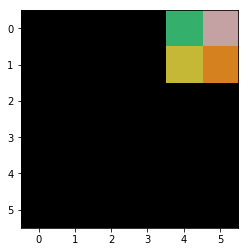

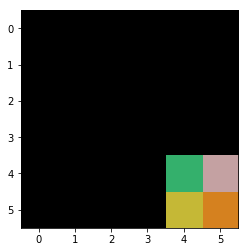

In [36]:
print(x.size())
importlib.reload(stats)
xs = stats.all_half_shifts(x)
for i in xs:
    for q in i:
        img.show_image(q)

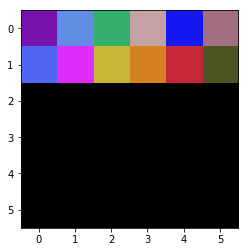

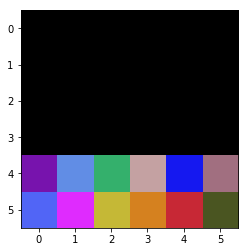

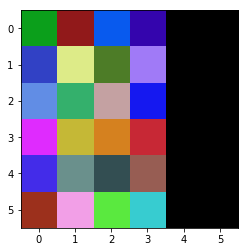

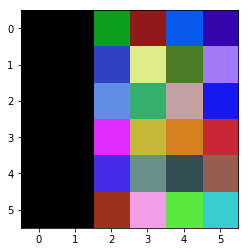

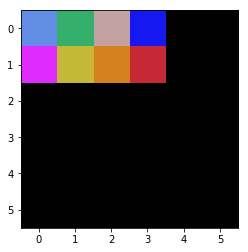

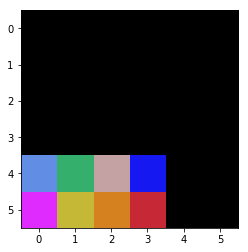

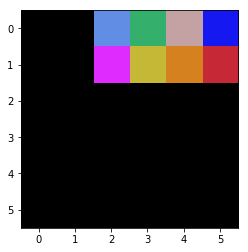

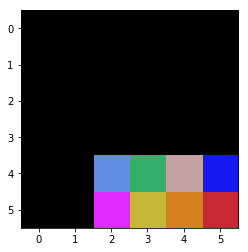

In [39]:
importlib.reload(stats)
z = stats.all_shifts(x, 2, 1, 2)

for i in z:
    img.show_image(i)

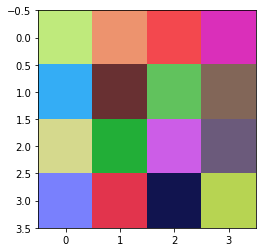

In [39]:
x = img.random_image(1, 4)
img.show_image(x)
shifter = shift.Shifter()

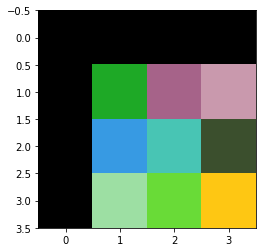

In [24]:
importlib.reload(stats)
y = stats.thinned(x)
img.show_image(y)

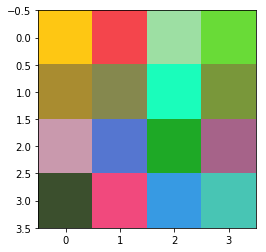

In [27]:
importlib.reload(stats)
y = stats.shifted(x, (1, 1), (3, 2))
img.show_image(y)

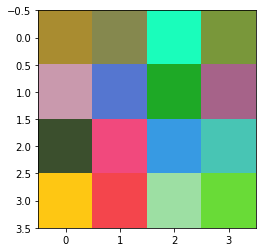

In [28]:
importlib.reload(stats)
y = stats.shifted(x, (1, 0), (3, 2))
img.show_image(y)

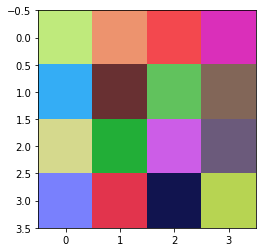

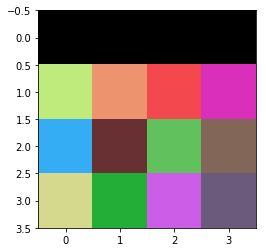

In [84]:
img.show_image(x)
importlib.reload(shift)
shifter = shift.Shifter()
y = shifter.displaced(x, (0, 1))
img.show_image(y)

In [50]:
shifter.__device

AttributeError: 'Shifter' object has no attribute '__device'

In [79]:
for i in (6, 5):
    print(i)

6
5
